In [1]:

! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [2]:
!kaggle  datasets download -d hijest/genre-classification-dataset-imdb

 96% 40.0M/41.7M [00:00<00:00, 53.3MB/s]
100% 41.7M/41.7M [00:00<00:00, 52.6MB/s]


In [3]:
!unzip genre-classification-dataset-imdb.zip

Archive:  genre-classification-dataset-imdb.zip
  inflating: Genre Classification Dataset/description.txt  
  inflating: Genre Classification Dataset/test_data.txt  
  inflating: Genre Classification Dataset/test_data_solution.txt  
  inflating: Genre Classification Dataset/train_data.txt  


In [4]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import re
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
train_data = pd.read_csv("/content/Genre Classification Dataset/train_data.txt" ,header = None, sep=':::')
train_data.columns = ['index', 'Name', 'Genre', 'Plot']
train_data.to_csv('train_data.csv', index = None)
train_data=train_data.drop(columns=['index'])

test_data = pd.read_csv("/content/Genre Classification Dataset/test_data.txt" ,header = None, sep=':::')
test_data.columns = ['index', 'Name', 'Plot']
test_data.to_csv('test_data.csv', index = None)
test_data.drop(columns=['index'])

test_data_solution = pd.read_csv("/content/Genre Classification Dataset/test_data_solution.txt" ,header = None, sep=':::')
test_data_solution.columns = ['index', 'Name', 'Genre', 'Plot']
test_data_solution.to_csv('test_data_solution.csv', index = None)
test_data_solution.drop(columns=['index'])


<ipython-input-5-2ffc19751dca>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("/content/Genre Classification Dataset/train_data.txt" ,header = None, sep=':::')
<ipython-input-5-2ffc19751dca>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("/content/Genre Classification Dataset/test_data.txt" ,header = None, sep=':::')
<ipython-input-5-2ffc19751dca>:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this war

,Name,Genre,Plot
0,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...
54195,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54196,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54197,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54198,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


In [6]:
train_data=pd.read_csv("/content/train_data.csv")
test_data=pd.read_csv("/content/test_data.csv")
test_data_solution=pd.read_csv("/content/test_data_solution.csv")

In [7]:
train_data.head()

,index,Name,Genre,Plot
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [8]:
(train_data['Genre'].unique())

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [9]:
train_data['Genre'] = pd.Categorical(train_data['Genre'], ordered=True).codes + 1
test_data_solution['Genre'] = pd.Categorical(test_data_solution['Genre'], ordered=True).codes + 1


In [10]:
nltk.download('stopwords')  #Stop words are common words like ‘the’, ‘and’, ‘I’,  Wse stop words from the text in a given corpus to clean up the data, and identify words that are more rare and potentially more relevant to what we’re interested in.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
from nltk.corpus import stopwords

In [12]:
from nltk.stem.porter import PorterStemmer

In [13]:

corpus=[]
validation_corpus=[]

In [ ]:
train_data['Plot'][0]

' Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.'

In [14]:
for i in range(0, train_data.shape[0]):
  plot=re.sub(pattern='[^a-zA-Z]', repl=' ', string=train_data['Plot'][i]).lower()
  words=plot.split()
  clean_words=[word for word in words if word not in set(stopwords.words('english'))]
  #keep the word as it is #for each iteration in list of words   #if that word is not in stopwords of english
  ps=PorterStemmer()
  words=[ps.stem(word) for word in clean_words]
  plot=' '.join(words)
  corpus.append(plot)



In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer instance
tfidf_vectorizer = TfidfVectorizer(max_features=6000)


X = tfidf_vectorizer.fit_transform(corpus).toarray()
y=train_data['Genre'].values




In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,y, random_state=0, test_size=0.2)

In [19]:
from sklearn.naive_bayes import MultinomialNB
classifier= MultinomialNB(alpha=0.1)
classifier.fit(x_train, y_train)

MultinomialNB(alpha=0.1)

In [20]:
y_pred=classifier.predict(x_test)
print(y_pred)

[ 8  9  8 ... 22  8  8]


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 7))

<Figure size 500x700 with 0 Axes>

<Figure size 500x700 with 0 Axes>

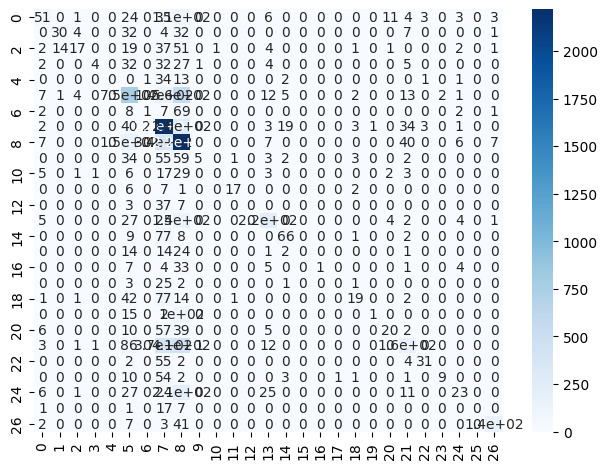

In [23]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.tight_layout()  # Add this line to adjust layout
plt.show()

In [24]:
from sklearn.metrics import accuracy_score
training_accuracy=accuracy_score(y_test, y_pred)

In [25]:
for i in range(0, test_data.shape[0]):
  plot=re.sub(pattern='[^a-zA-Z]', repl=' ', string=test_data['Plot'][i]).lower()
  words=plot.split()
  clean_words=[word for word in words if word not in set(stopwords.words('english'))]
  #keep the word as it is #for each iteration in list of words   #if that word is not in stopwords of english
  ps=PorterStemmer()
  words=[ps.stem(word) for word in clean_words]
  plot=' '.join(words)
  validation_corpus.append(plot)

In [26]:

X_validation = tfidf_vectorizer.transform(validation_corpus).toarray()
y_validation=test_data_solution['Genre'].values

In [27]:

y_pred_validation=classifier.predict(X_validation)
print(y_pred_validation)


[ 9  9  8 ...  6  8 22]


In [28]:
validation_accuracy = accuracy_score(y_validation, y_pred_validation)
print("Validation Accuracy:", validation_accuracy)

Validation Accuracy: 0.5433025830258302


In [29]:

cm2=confusion_matrix(y_validation, y_pred_validation)
cm2

array([[  302,     2,     4,     0,     0,   109,     1,   201,   586,
            1,     3,     0,     0,    31,     1,     0,     0,     0,
            1,     1,    25,     9,    18,     1,    15,     0,     3],
       [    7,   133,    15,     0,     0,   195,     1,    46,   168,
            0,     0,     0,     0,     5,     1,     0,     0,     0,
            0,     0,     1,    16,     1,     0,     1,     0,     0],
       [   24,    92,    82,     3,     0,    70,     0,   190,   257,
            1,     2,     0,     1,    19,     0,     0,     0,     0,
            2,     0,     9,    10,     1,     0,     4,     0,     8],
       [   22,     0,     5,    17,     0,   107,     0,   150,   138,
            1,     6,     0,     0,    16,     2,     0,     0,     0,
            2,     0,    10,    20,     1,     0,     0,     0,     1],
       [    0,     1,     1,     0,     0,     7,     0,   191,    56,
            0,     0,     0,     0,     2,     0,     0,     0,     0,
  

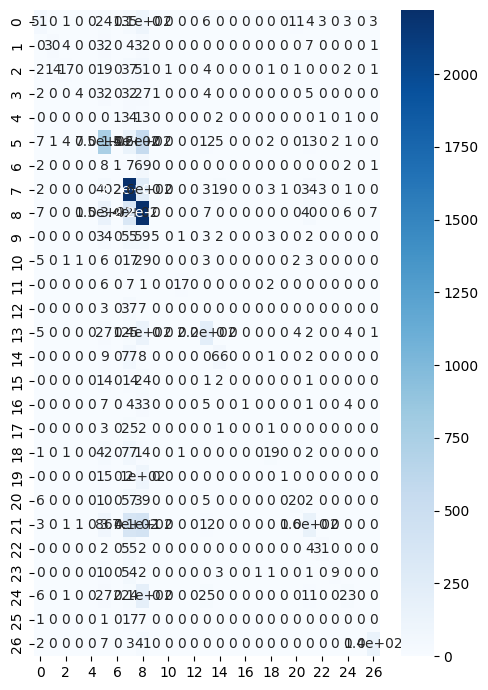

In [30]:
plt.figure(figsize=(5, 7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.tight_layout()  # Add this line to adjust layout
plt.show()

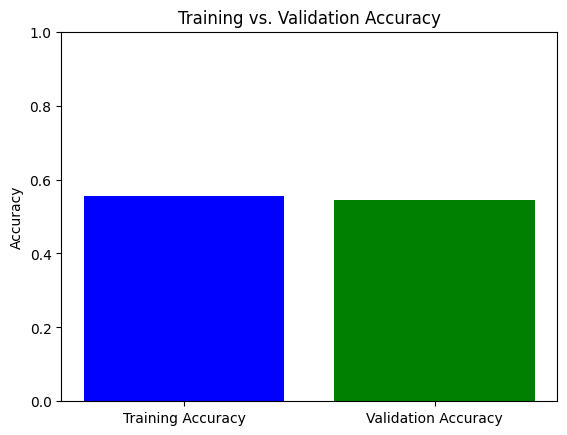

In [31]:
labels = ['Training Accuracy', 'Validation Accuracy']
accuracies = [training_accuracy, validation_accuracy]

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.title('Training vs. Validation Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.show()